# Utility Functions
Utility functions describes how `Expected Utility` can be used to model an investor's preferences.

### Choosing between distributions
Let 

$X = $ Random variable representing possible P&L if you follow certain investment strategy 

&

$Y = $ Same as $X$ but follow another investment strategy.

Suppose that you must choose between a number of possible probability distributions for your future wealth.
It is natural to try to rank probability distributions. Suppose that you have some ordering $\prec$
on probability distributions so you prefer receiving the random income $Y$ to the random income $X$
if
$$
d(X) \prec d(Y).
$$
where $d(X)$ denotes the distribution of $X$.

**Theorem:** **(Von Neumann Morgernstern Utility theorem)**:
- Axiom 1 (Completeness)
- Axiom 2 (Transitivity)
- Axiom 3 (Continuity)
- Axiom 3′ (Archimedean property)
- Axiom 4 (Independence)
- Axiom 4′ (Reduction of compound lotteries)

Under some very reasonable conditions on $\prec$ i.e.(Axioms 1-4), we can find a *utility function* 
$u:{\mathbb R} \to {\mathbb R}$ such that

$$d(X) \prec d(Y) \iff E(u(X)) < E(u(Y))$$

We say that the preferences are given by *expected utility*.

### Choosing a utility function

We can't find someone's utility function, we just a *model* for someone's preferences.

For the sake of simplicity people usually assume the preferences take one of the following forms which
each depend on a single parameter. In practice people then estimate this single parameter using a questionnaire on risk preferences. If you go to a financial adviser, they will often use such a questionnaire to estimate
your risk preferences.
Utility functions are `Concave increasing` functions. It satsifies $u^{\prime\prime}(x)<0$. 

$u$ might not be differentiable, but one would still expect that it is *concave*.

### Exponential utility Function

The exponential utility function with risk parameter $\lambda>0$ is given by
$$u(x)=\frac{1-e^{-\lambda x}}{\lambda}$$
This is also called the `Constant Absolute Risk Aversion (CARA) utility function`. This is
because for $\alpha \in {\mathbb R}$:
$$X \prec Y \iff X + \alpha \prec Y + \alpha.$$
**Remark:** If you use the utility function
$$u(x)=e^{-\lambda x}$$
you will get exactly the same preferences. Shifting and scaling a utility function makes
no differences to the resulting preferences. The more complex definition is just a matter of convention.
- $\lambda$ high $\longrightarrow$ Don't like taking risks (Highly risk-averse).
- $\lambda$ low $\longrightarrow$ Willing to take risks in exchange for good return (Less risk-averse).

Risk Aversion is determined by the curvature of the Utility function. The greater the curvature, the greater the degree of Risk Aversion.

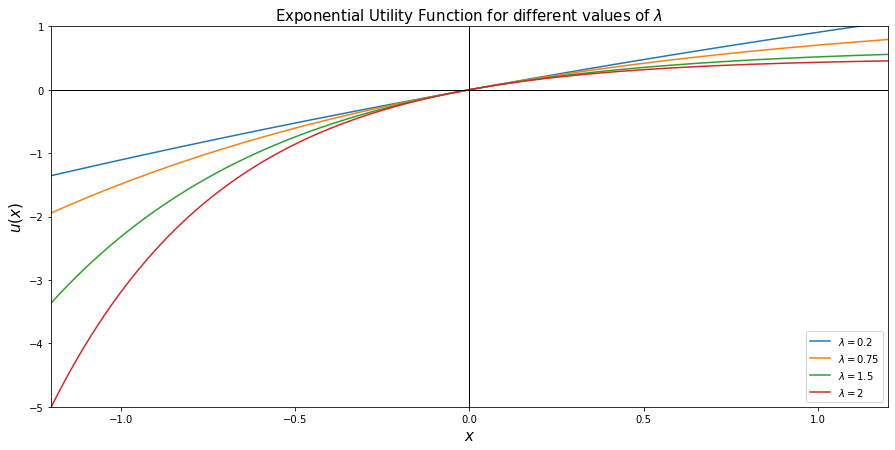

In [35]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [15,7]

x = np.linspace(-1.2,1.2,1000)
ax = plt.gca()
for lam in [0.2,0.75,1.5,2]:
    u = (1-np.exp(-lam*x))/lam
    ax.plot(x,u, label="$\lambda = {}$".format(lam))
ax.legend();
ax.axhline(y=0, color='k',linewidth=1);
ax.axvline(x=0, color='k',linewidth=1);
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-5,1);
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$u(x)$',fontsize=15)
plt.title("Exponential Utility Function for different values of $\lambda$",fontsize=15);

### Power Utility Function

The Power Utility function or Constant Relative Risk Aversion (CRRA) utility function with risk aversion $\eta$ is 
$$
u(x)=\begin{cases}
\frac{x^{1-\eta}-1}{1-\eta} & x\geq 0 \quad \eta\neq 1 \\
\log(x) & \eta=1 \\
-\infty & \text{otherwise}
\end{cases}
$$
It's name comes from the fact
$$X \prec Y \iff \alpha X \prec \alpha Y$$
for $\alpha \in {\mathbb R}_{\geq 0}$.

If you ignore the shift and scale, they are given by a power of $x$ (except in the special limiting case when $\eta=1$). The reason for $-\infty$ for $x<0$ is that it encodes the fact that we hate making losses and we refuse to make any loss at all. So if you make any loss, instantly the Expected utility will be $-\infty$ and the strategy will be ruled out.

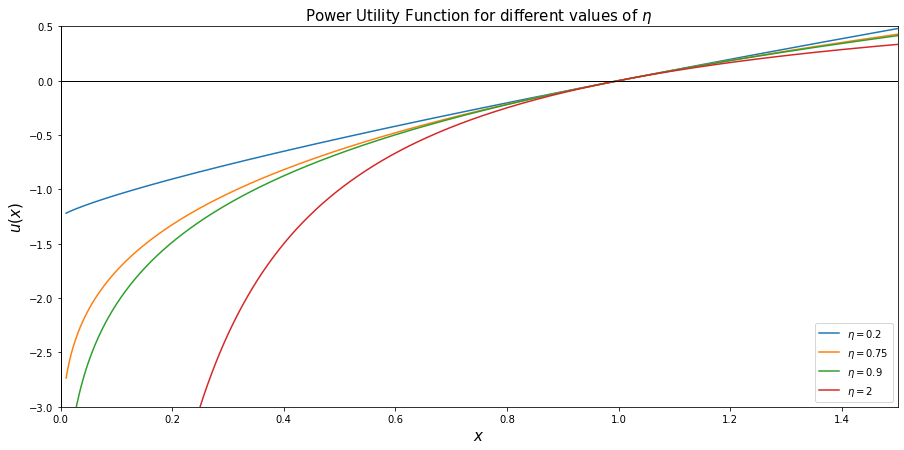

In [36]:
x = np.linspace(0.01,1.5,1000)
ax = plt.gca()
for eta in [0.2,0.75,0.90,2]:
    u = (x**(1-eta)-1)/(1-eta)
    ax.plot(x,u, label="$\eta = {}$".format(eta))
ax.legend();
ax.axhline(y=0, color='k',linewidth=1);
ax.axvline(x=0, color='k',linewidth=1);
ax.set_xlim(0,1.5)
ax.set_ylim(-3,0.5); 
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$u(x)$',fontsize=15)
plt.title("Power Utility Function for different values of $\eta$",fontsize=15);

### Preferences over time
An expected utility function can be used to compare your wealth at a moment in time. You might also want to compare consumption over time. This is a more complex subject.
Suppose $(\gamma^1)_t$ is a sequence of random payouts and $(\gamma^2)_t$ is
another possible sequence of payouts occuring at times $t \in {\cal T}$.
How can you decide which you prefer?

**Definition:** Expected utility preferences over consumption streams $\gamma^1_t$
    and $\gamma^2_t$ with utility function $u$ and discount factor $b$
    are defined by
    
$$ \gamma^1 \prec \gamma^2 \iff E\left(\sum_{t \in {\cal T}} e^{-bt} u(\gamma^1_t) \right)
< E\left( \sum_{t \in {\cal T}} e^{-bt} u(\gamma^2_t) \right) $$
If $b>0$, then the discount factor means that you prefer receiving money sooner rather than later.
### Satiation and Risk-Aversion
    
There are actually two distinct reasons why a utility function is normally concave

* *Satiation* preferences. You can sail on one yacht at a time, so your second billion probably won't make as big a difference as your first billion did.
* *Risk aversion*. You prefer receiving an average value with certainty to receiving an uncertain value with the same mean.

You can't tell from a utility function which is the cause of the concavity, so we only use
one parameter $\lambda$ or $\eta$. When you consider preferences over time, it actually
becomes possible to separate satiation and risk aversion.

### Simulation 1:
Suppose that a stock follows discrete-time geometric Brownian motion with drift $\mu=0.07$ and $\sigma=0.15$.
Suppose that you can also put money into a risk-free bank account so it grows at a rate $r=0.03$. If you have an initial wealth of $100$ and put $30\%$ of your money into the risk-free account and $70\%$ into stocks at time $0$ (If you put $P$ into the risk-free bank account at time $0$ then at time $t$ you will have $P e^{rt}$ in the bank account). Lets perform 100000 simulations to find your expected (mean) payoff at time $T=1$. 

In [38]:
import mathfinance as mf

mu = 0.07
sigma = 0.15
r = 0.03
T = 1
n_steps = 1
n_scenarios = 100000    # No of paths of stock price simulations.
S0 = 1    # Initial Stock Price.
alpha = 0.3  # Proportion invested in the risk-free account.
P = 100    # Initial Wealth.

# Simulating stock prices and calculating expected payoff.
S, times = mf.simulate_gbm_paths(S0,mu,sigma,T,n_steps,n_scenarios)
ST = S[:,-1]  # Final prices (ST) from the last time step of each scenario in the simulated paths.
payoff = alpha*P*np.exp(r*T) + (1-alpha)*P* ST/S0
mean_payoff = np.mean( payoff )

# Chosing the tolerance level so that probability of the test failing is very low.
tolerance = 0.3
standard_error = np.std( payoff )/np.sqrt(n_scenarios)
assert 8*standard_error<tolerance
mean_payoff

105.98950909209236

The step size for the simulation is unimportant because the distribution of the stock price at time $T$ will be the same no matter how man steps we take in our simulation.
Lets use an analytic formula for expected payoff and compare with mean payoff. Let $P$ denote the initial wealth.

$$
\begin{split}
E(\text{payoff} ) &= \alpha e^{r T} P + E(S_T)(1-\alpha)(\frac{P}{S_0}) \\
&= \alpha e^{r T} P + (1-\alpha)  e^{\mu T} P 
\end{split}
$$

In [39]:
expected_payoff = alpha*np.exp(r*T)*P + (1-alpha)*P*np.exp(mu*T)
assert( abs(expected_payoff-mean_payoff) < tolerance )

### Simulation 2:
Suppose now that your preferences are given by the power utility function with $\eta=\frac{1}{2}$. Lets perform a simulation to find the expected utility at time $1$.

In [40]:
def compute_expected_utility( alpha, eta, ST ):
    payoff = alpha*P*np.exp(r*T) + (1-alpha)*P* ST/S0 
    uVal = (payoff**(1-eta))/(1-eta)
    expected_utility = np.mean( uVal )
    error_estimate = np.std(uVal)/np.sqrt( len( ST ))
    return expected_utility, error_estimate

expected_utility,error_estimate = compute_expected_utility( alpha, 0.5, ST )
assert 8*error_estimate < 0.1
expected_utility

20.561123244719486

Lets repeat the simulation for different proportions, $\alpha$, invested in stocks and the risk-free account and
plot a graph of how expected utility varies with $\alpha$. We don't need to simulate stock price again as we can use the previous values(otherwise the graph will not be smooth).

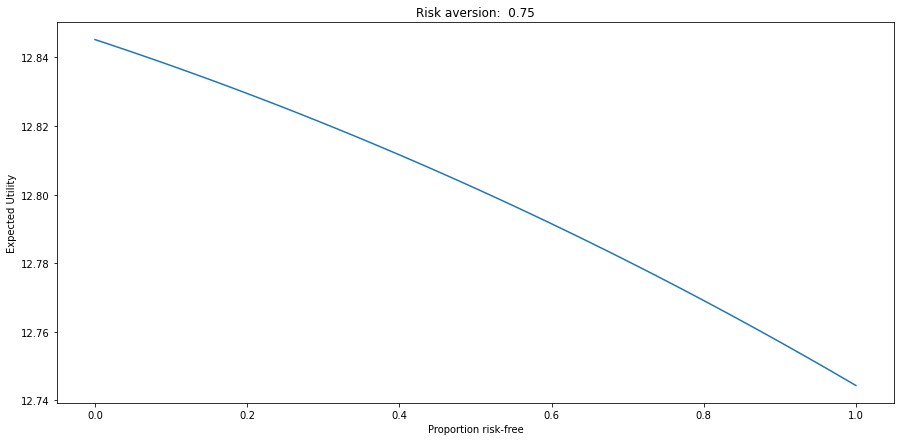

In [43]:
def proportion_plot( ax, risk_aversion, ST ):
    alpha = np.linspace(0,1,100)
    eu = np.zeros( len( alpha ))
    for i in range(0,len(alpha)):
        expected_utility,error_estimate  = compute_expected_utility( alpha[i], risk_aversion, ST )
        eu[i] = expected_utility
    ax.plot( alpha, eu );
    ax.set_xlabel('Proportion risk-free')
    ax.set_ylabel('Expected Utility')
    ax.set_title('Risk aversion:  {}'.format(risk_aversion))
    
ax= plt.gca()
proportion_plot(ax,0.75, ST) # Here we use risk aversion value of 0.75.

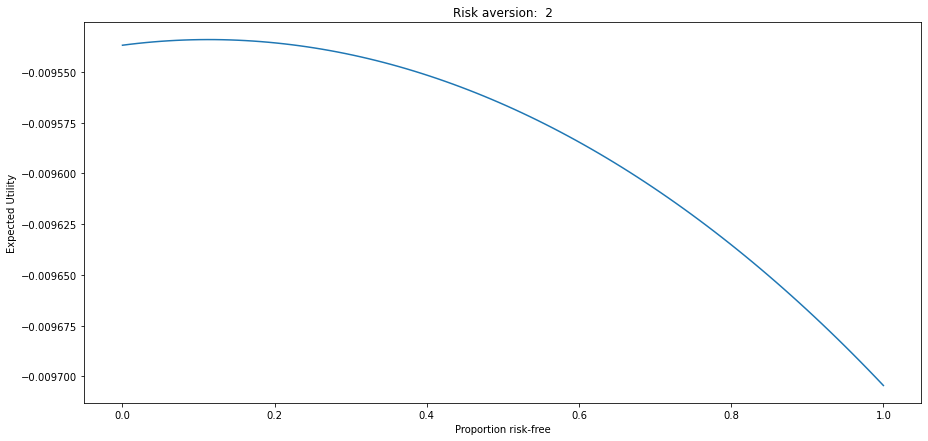

In [44]:
ax= plt.gca()
proportion_plot(ax,2, ST) # Here we use risk aversion value of 2.

Lets check whether a less risk-averse individual should put a greater proportion of their wealth into stocks than a highly risk-averse individual using the simulations.

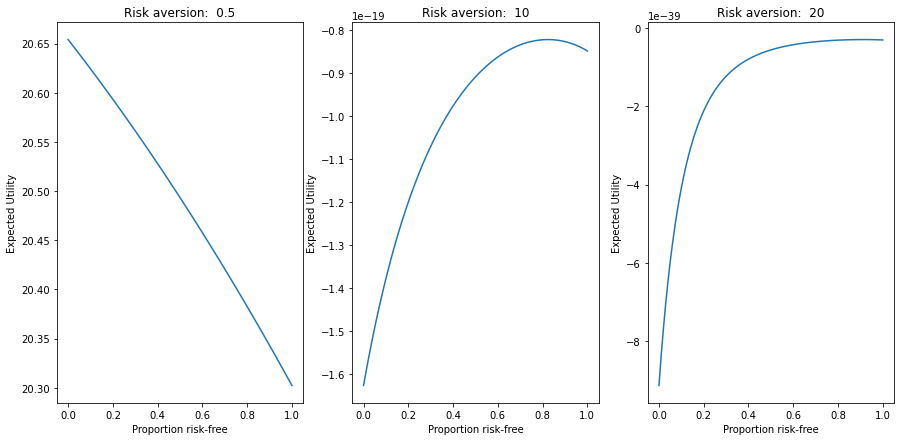

In [45]:
fig, ax = plt.subplots(1,3)
proportion_plot(ax[0], 0.5, ST)
proportion_plot(ax[1], 10, ST)
proportion_plot(ax[2], 20, ST)

These plots indicate that a high risk-averse individual should put more of there wealth in risk-free assets than a less risk-averse individual.